In [16]:
# Import dependencies for exploratory analysis 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline 

In [2]:
# Import and read the loan_approval_dataset.csv.
loan_df = pd.read_csv(Path('Resources/loan_approval_dataset.csv'))
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Check for leading/trailing whitespaces in the column names
loan_df.columns = loan_df.columns.str.strip()

In [5]:
# Check the datatypes of the columns in the DataFrame 
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


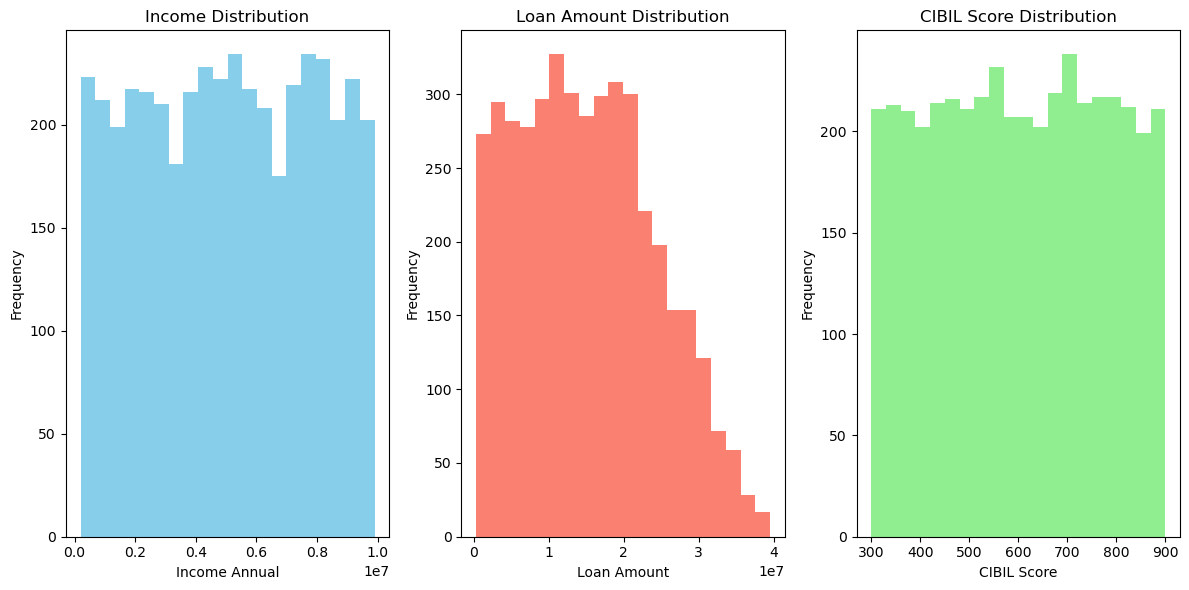

In [12]:
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.hist(loan_df['income_annum'], bins=20, color='skyblue')
plt.xlabel('Income Annual')
plt.ylabel('Frequency')
plt.title('Income Distribution')

plt.subplot(132)
plt.hist(loan_df['loan_amount'], bins=20, color='salmon')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')

plt.subplot(133)
plt.hist(loan_df['cibil_score'], bins=20, color='lightgreen')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.title('CIBIL Score Distribution')

# Save an image of the chart and print it to the screen
plt.savefig("Figures/histograms.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

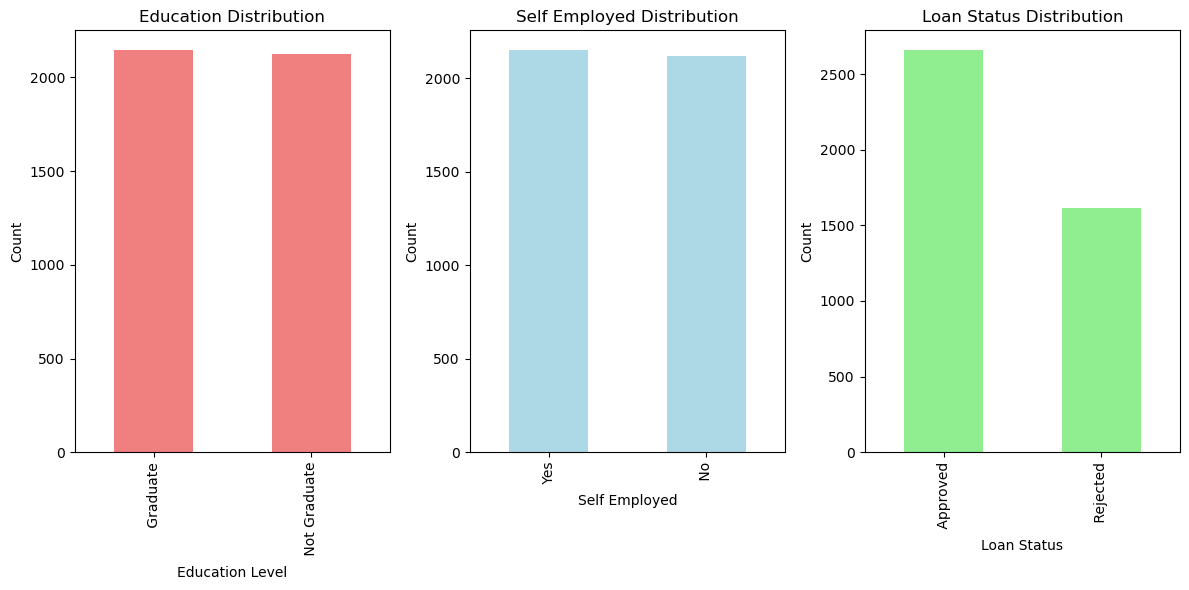

In [13]:
# Bar Charts
plt.figure(figsize=(12, 6))
plt.subplot(131)
loan_df['education'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Distribution')

plt.subplot(132)
loan_df['self_employed'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Self Employed Distribution')

plt.subplot(133)
loan_df['loan_status'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Distribution')

# Save an image of the chart and print it to the screen
plt.savefig("Figures/bar_charts.png", bbox_inches="tight")
plt.tight_layout()
plt.show()

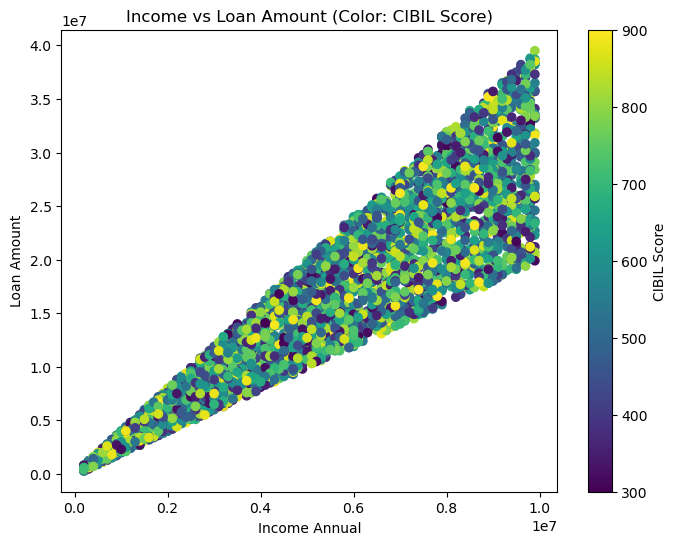

In [19]:
# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(loan_df['income_annum'], loan_df['loan_amount'], c=loan_df['cibil_score'], cmap='viridis')
plt.xlabel('Income Annual')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount (Color: CIBIL Score)')
plt.colorbar(label='CIBIL Score')

# Save an image of the chart and print it to the screen
plt.savefig("Figures/scatterplot.png", bbox_inches="tight")
plt.show()